### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### 1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [125]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

%matplotlib inline

In [126]:
data,target = make_regression(1000,2)

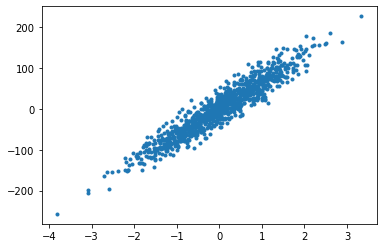

In [127]:
plt.plot(data[:,0],target,'.')
plt.show()

In [128]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [129]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Градиентный спуск.

In [130]:
def GD(data, target, min_weight_dist=1e-5, max_iter=1e5):
    np.random.seed(1234)
    # инициализируем начальный вектор весов
    w = np.zeros(data.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = [mserror(data,w,target)]
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    eta = 0.05
    # ход градиентного спуска
   
    while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
        new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    # оценка рассояния по эвклиду между старым и новым состоянием w
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append([iter_num]+new_w.copy().tolist())
        errors.append(mserror(data, new_w, target))
    
        iter_num += 1
        w = new_w
                   

    w_list = np.array(w_list)
    error_list= np.array(errors)

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во итераций - {iter_num}')
    print(f'Веса - {new_w}')
    return w_list, error_list

In [131]:
%%time
w_gd, err_gd = GD(data, target, min_weight_dist=1e-8, max_iter=1e5)

В случае использования градиентного спуска функционал ошибки составляет 2.2161
Кол-во итераций - 193
Веса - [62.41686372 20.54814168]
Wall time: 55.8 ms


<ipython-input-130-88b9b8e2e5cd>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  w_list = np.array(w_list)


Cтохастический градиентный спуск.

In [132]:
def SGD(data, target, min_weight_dist=1e-5, max_iter=1e5):
    # инициализируем начальный вектор весов
    w = np.zeros(data.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = []
    # шаг градиентного спуска
    eta = 0.1 #0.5
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    np.random.seed(1234)
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * (np.dot(data[train_ind].T, np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во инераций - {iter_num}')
    print(f'Веса - {new_w}')
    return w_list, errors

In [133]:
%%time
w_sgd, err_sgd = SGD(data, target, min_weight_dist=1e-8, max_iter=1e6) #max_iter=1e8

В случае использования стохастического градиентного спуска функционал ошибки составляет 2.2165
Кол-во инераций - 1000000
Веса - [62.42695226 20.53321186]
Wall time: 2min 49s


In [134]:
#Plot MSE
len(err_gd), len(err_sgd)

(194, 1000000)

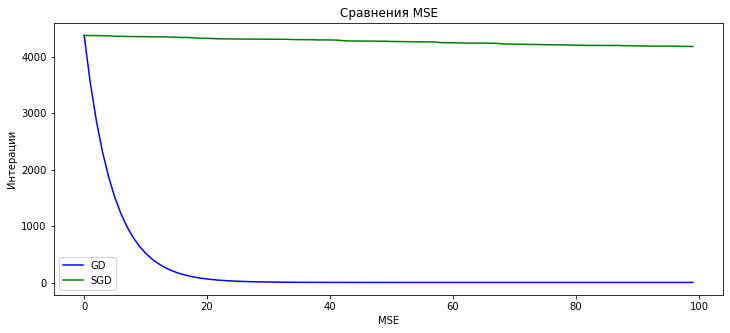

In [135]:
plt.figure(figsize=(12, 5))
plt.title('Сравнения MSE')
plt.xlabel(r'MSE')
plt.ylabel(r'Интерации')

n = min(len(err_gd), len(err_sgd), 100)
plt.plot(err_gd[:n], c='b', label='GD');
plt.plot(range(n), err_sgd[:n], c='g', label='SGD');
plt.legend();

В обоих случаях при приближении вектора весов к истинному, падает ошибка. Скорость ее падения для градиентного спуска выше и однородней, чем для стохастического градиентного спуска.

#### 2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [137]:
def GD_2(data, target, min_weight_dist=1e-5, max_iter=1e5, l1 =0, l2 =0):
    np.random.seed(1234)
    # инициализируем начальный вектор весов
    w = np.zeros(data.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = [mserror(data,w,target)]
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    eta = 0.05
    # ход градиентного спуска
   
    while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
        new_w = w - 2 * eta * (np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0] + l1 * np.sign(w) + 2 * l2 * w)
    # оценка рассояния по эвклиду между старым и новым состоянием w
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append([iter_num]+new_w.copy().tolist())
        errors.append(mserror(data, new_w, target))
    
        iter_num += 1
        w = new_w
                   

    w_list = np.array(w_list)
    error_list= np.array(errors)

    print(f'В случае использования градиентного спуска c 𝐿2 -регуляризацией функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во итераций - {iter_num}')
    print(f'Веса - {new_w}')
    return w_list, error_list

In [138]:
%%time
w_gd_2, err_gd_2 = GD_2(data, target, min_weight_dist=1e-8, max_iter=1e5, l1=1e-8, l2=1e-8)

В случае использования градиентного спуска c 𝐿2 -регуляризацией функционал ошибки составляет 2.2161
Кол-во итераций - 193
Веса - [62.41686247 20.54814129]
Wall time: 53.5 ms


<ipython-input-137-c817a63526c0>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  w_list = np.array(w_list)


In [139]:
def SGD_2(data, target, min_weight_dist=1e-5, max_iter=1e5, l1 =0, l2 =0):
    # инициализируем начальный вектор весов
    w = np.zeros(data.shape[1])
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    # список значений ошибок после каждой итерации
    errors = []
    # шаг градиентного спуска
    eta = 0.5
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    np.random.seed(1234)
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * (np.dot(data[train_ind].T, np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    print(f'Кол-во инераций - {iter_num}')
    print(f'Веса - {new_w}')
    return w_list, errors

In [141]:
%%time
w_sgd_2, err_sgd_2 = SGD_2(data, target, min_weight_dist=1e-8, max_iter=1e6, l1=1e-8, l2=1e-8)

В случае использования стохастического градиентного спуска функционал ошибки составляет 312.2252
Кол-во инераций - 1304
Веса - [45.74537072 15.23972755]
Wall time: 226 ms


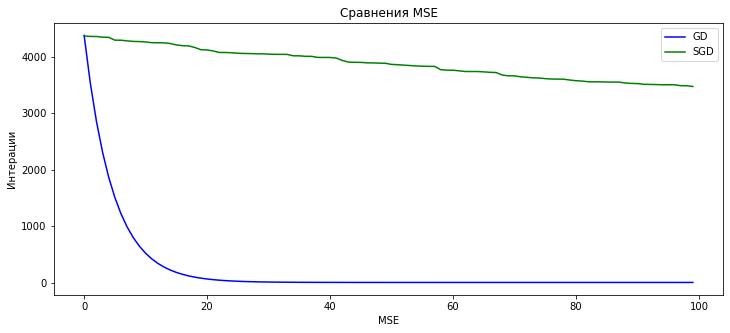

In [142]:
plt.figure(figsize=(12, 5))
plt.title('Сравнения MSE')
plt.xlabel(r'MSE')
plt.ylabel(r'Интерации')

n = min(len(err_gd_2), len(err_sgd_2), 100)
plt.plot(err_gd_2[:n], c='b', label='GD');
plt.plot(range(n), err_sgd_2[:n], c='g', label='SGD');
plt.legend();